# Risk Assessment and Strategic Aircraft Selection for a Safe and Profitable Aviation Venture

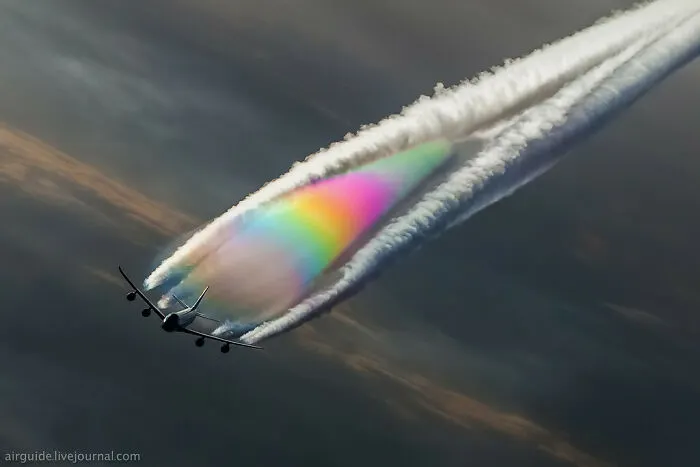

## Introduction

As our comapany,DawnsEstate,expands into new industries to diversify its portfolio, we are exploring the aviation sector, specifically the purchase and operation of aircraft for both commercial and private enterprises. However, entering this industry requires a thorough understanding of the risks associated with different aircraft models. Factors such as safety records, operational reliability, maintenance costs, and historical accident data must be carefully analyzed to minimize financial and operational risks.

### Project Objectives

Our objectives include:

1.Identify the lowest-risk aircraft models that align with our business goals.

2.Conducting a data-driven analysis of aircraft safety, reliability, and operational efficiency.

3.Provide actionable insights that will guide investment decisions.

### Why This Analysis Matters

Investing in aviation is a high-stakes decision that can impact our company's reputation, financial stability, and long-term success. Poor aircraft selection can lead to increased maintenance costs, higher insurance premiums, operational disruptions, and, in extreme cases, safety incidents. By leveraging data analytics and industry research, we can make informed choices that reduce risk and maximize profitability.

Through this project, we will provide the head of the new aviation division with a comprehensive evaluation of aircraft models, allowing for strategic decision-making in acquiring and operating aircraft safely and efficiently.

## Chapter One: Data Preparation and Data Cleaning

### Data Preparation

We will be using pandas for our data preparation and cleaning as well as numpy for mathematical computations. Let's proceed and import the relevant libraries.

In [1]:
import pandas as pd
import numpy as np

In [2]:
## Using(engine='python') may be essential to solve a possible parse error.
aviation_data=pd.read_csv("AviationData.csv",engine="python")

In [3]:
aviation_data

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
aviation_data.isnull().sum()
#Let's check out the null values as we examine the dataset keys.

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [5]:
type(aviation_data)

pandas.core.frame.DataFrame

In [6]:
## We will also load the US State Codes for later use.
state_codes=pd.read_csv("USState_Codes.csv")

In [7]:
state_codes

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
...,...,...
57,Virgin Islands,VI
58,Washington_DC,DC
59,Gulf of mexico,GM
60,Atlantic ocean,AO


### Data Cleaning 

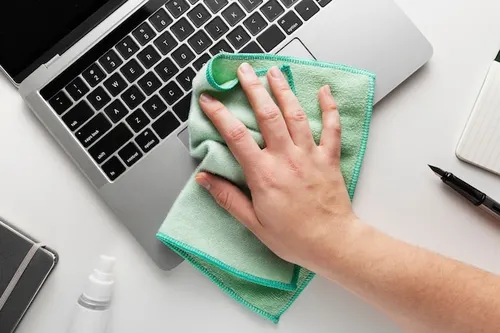

Here we will be looking for irrelevant data, replacing duplicates and with mathematical analysis judege how to approach missing values that may affect our research. We can also drop unneccesary columns and pick those that are important to us for later visualization. 

In [8]:
aviation_data.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

Also check for duplicates

In [9]:
duplicates = aviation_data.duplicated()
duplicates.value_counts()

False    88889
dtype: int64

We have no duplicates.We have 52 missing entries on our["Location"] column. We can drop them as they do not greatly affect our research.

In [10]:
aviation_data=aviation_data.dropna(subset=["Location"])

The columns "Latitude" and "Longitude" and "Schedule" are mostly null so we can drop them. The publication date is unnecessary data as we can use the "Event.date" to know hwne the accidents occurred.

In [11]:
aviation_data=aviation_data.drop(columns=["Latitude","Longitude","Schedule","Publication.Date"])

Most items on our dataset happened in United States. We can fill the 226 empty data with "United States"

In [12]:
aviation_data["Country"]=aviation_data["Country"].fillna("United States")

Since we will need data on the "Make", "Model" and "Amateur.Built" and we can't guess the data let's drop the missing rows.

In [13]:
aviation_data=aviation_data.dropna(subset=["Make","Model","Amateur.Built"])

In [14]:
aviation_data

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,FAR.Description,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,Fatal(2),Destroyed,...,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,Fatal(4),Destroyed,...,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,NaN,NaN,Fatal(3),Destroyed,...,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,Fatal(2),Destroyed,...,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,Fatal(1),Destroyed,...,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,Minor,NaN,...,091,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,PAN,PAYSON,Non-Fatal,Substantial,...,091,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,091,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [15]:
aviation_data.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Airport.Code              38428
Airport.Name              35896
Injury.Severity             979
Aircraft.damage            3149
Aircraft.Category         56412
Registration.Number        1189
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines          5919
Engine.Type                6926
FAR.Description           56721
Purpose.of.flight          6066
Air.carrier               72025
Total.Fatal.Injuries      11309
Total.Serious.Injuries    12387
Total.Minor.Injuries      11806
Total.Uninjured            5821
Weather.Condition          4379
Broad.phase.of.flight     26979
Report.Status              6335
dtype: int64

Let's look at how the column "Weather.Condition" relates with other essential columns for this project.

In [16]:
aviation_data["Weather.Condition"].value_counts() 

VMC    77200
IMC     5960
UNK      829
Unk      262
Name: Weather.Condition, dtype: int64

In [17]:
aviation_data[["Number.of.Engines","Make","Model","Total.Fatal.Injuries",
               "Total.Serious.Injuries","Total.Minor.Injuries","Total.Uninjured","Weather.Condition"]]

,Number.of.Engines,Make,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,1.0,Stinson,108-3,2.0,0.0,0.0,0.0,UNK
1,1.0,Piper,PA24-180,4.0,0.0,0.0,0.0,UNK
2,1.0,Cessna,172M,3.0,NaN,NaN,NaN,IMC
3,1.0,Rockwell,112,2.0,0.0,0.0,0.0,IMC
4,NaN,Cessna,501,1.0,2.0,NaN,0.0,VMC
...,...,...,...,...,...,...,...,...
88884,NaN,PIPER,PA-28-151,0.0,1.0,0.0,0.0,NaN
88885,NaN,BELLANCA,7ECA,0.0,0.0,0.0,0.0,NaN
88886,1.0,AMERICAN CHAMPION AIRCRAFT,8GCBC,0.0,0.0,0.0,1.0,VMC
88887,NaN,CESSNA,210N,0.0,0.0,0.0,0.0,NaN


In [18]:
### Replacing for unk weather conditions to make tha dataset cleaner.We can also fill the null data with UNK. We will be using .replace() and .fillna()

aviation_data=aviation_data.copy()
aviation_data["Weather.Condition"] = aviation_data["Weather.Condition"].replace({"Unk": "UNK"})
aviation_data["Weather.Condition"]=aviation_data["Weather.Condition"].fillna("UNK")
aviation_data["Weather.Condition"].value_counts()

VMC    77200
IMC     5960
UNK     5470
Name: Weather.Condition, dtype: int64

That done let us look at the "Make" column data and check fo patterns that need cleaning.

In [19]:
aviation_data["Make"].value_counts().head(50)

Cessna                            22200
Piper                             12015
CESSNA                             4919
Beech                              4321
PIPER                              2840
Bell                               2128
Boeing                             1552
BOEING                             1145
Grumman                            1094
Mooney                             1090
BEECH                              1041
Robinson                            944
Bellanca                            885
Hughes                              795
Schweizer                           627
Air Tractor                         595
BELL                                588
Mcdonnell Douglas                   519
Aeronca                             486
Maule                               445
Champion                            428
De Havilland                        382
Aero Commander                      360
Stinson                             348
Aerospatiale                        342


There were instances of inconsistent naming of related values. Lets make them as uniform as possible for analysis.

In [20]:
aviation_data["Make"]=aviation_data["Make"].replace({"CESSNA":"Cessna","BOEING":"Boeing","PIPER":"Piper","BEECH":"Beech","Airbus Industrie":"AIRBUS",})
aviation_data["Make"] = aviation_data["Make"].apply(lambda x: x.lower().capitalize() if isinstance(x, str) else x)
aviation_data["Make"].value_counts()

Cessna                    27119
Piper                     14855
Beech                      5362
Bell                       2716
Boeing                     2697
                          ...  
Foster john                   1
Danny m damron                1
Cap                           1
Scoda aeronautica ltda        1
Burken                        1
Name: Make, Length: 7573, dtype: int64

Now our "Make" column makes sense.

For missing values in "Report.Status" lets use "Not Specified".

In [21]:
aviation_data["Report.Status"]=aviation_data["Report.Status"].fillna("Not Specified")

In [22]:
aviation_data.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Airport.Code              38428
Airport.Name              35896
Injury.Severity             979
Aircraft.damage            3149
Aircraft.Category         56412
Registration.Number        1189
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines          5919
Engine.Type                6926
FAR.Description           56721
Purpose.of.flight          6066
Air.carrier               72025
Total.Fatal.Injuries      11309
Total.Serious.Injuries    12387
Total.Minor.Injuries      11806
Total.Uninjured            5821
Weather.Condition             0
Broad.phase.of.flight     26979
Report.Status                 0
dtype: int64

In [23]:
aviation_data["Aircraft.Category"].value_counts()

Airplane             27557
Helicopter            3431
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
ULTR                     1
Rocket                   1
Name: Aircraft.Category, dtype: int64

Fill missing data for Aircraft category with the most appearing data.

In [24]:
aviation_data["Aircraft.Category"]= aviation_data["Aircraft.Category"].fillna(aviation_data["Aircraft.Category"].mode()[0])
aviation_data["Aircraft.Category"] = aviation_data["Aircraft.Category"].replace({"UNK": "Unknown","ULTR":"Ultralight"})

In [25]:
aviation_data["Aircraft.Category"].value_counts()

Airplane             83969
Helicopter            3431
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              31
Unknown                 16
WSFT                     9
Powered-Lift             5
Blimp                    4
Rocket                   1
Name: Aircraft.Category, dtype: int64

For number of Injuries we had cases where the data wasn't indicated. We can let the number be zero.

In [26]:
aviation_data["Total.Fatal.Injuries"]= aviation_data["Total.Fatal.Injuries"].fillna(0.0)
aviation_data["Total.Serious.Injuries"]= aviation_data["Total.Serious.Injuries"].fillna(0.0)
aviation_data["Total.Minor.Injuries"]= aviation_data["Total.Minor.Injuries"].fillna(0.0)
aviation_data["Total.Uninjured"]= aviation_data["Total.Uninjured"].fillna(0.0)

For "Purpose of flight" we may need the data for comparison of whether we can delve into the private or commercial sector.

In [27]:
aviation_data["Purpose.of.flight"]

0        Personal
1        Personal
2        Personal
3        Personal
4        Personal
           ...   
88884    Personal
88885         NaN
88886    Personal
88887    Personal
88888    Personal
Name: Purpose.of.flight, Length: 88630, dtype: object

In [28]:
## Fill the missing values with the most appearing string.
aviation_data["Purpose.of.flight"]= aviation_data["Purpose.of.flight"].fillna(aviation_data["Purpose.of.flight"].mode()[0])

Replace null strings about the airports with "Not Speciied"

In [29]:
aviation_data["Airport.Code"]= aviation_data["Airport.Code"].fillna("Not Specified")
aviation_data["Airport.Name"]= aviation_data["Airport.Name"].fillna("Not Specified")
aviation_data["Air.carrier"]= aviation_data["Air.carrier"].fillna("Not Specified")
aviation_data["Broad.phase.of.flight"]= aviation_data["Broad.phase.of.flight"].fillna("Not Specified")
aviation_data["Report.Status"]= aviation_data["Report.Status"].fillna("Not Specified")
aviation_data["Registration.Number"]=aviation_data["Registration.Number"].fillna("NNNNNN")

The "FAR Description" shows if particular airlines had followed the FAR regulations and is necessary to clean it.

In [30]:
aviation_data["FAR.Description"].value_counts()

091                               18220
Part 91: General Aviation          6457
NUSN                               1573
137                                1010
NUSC                                987
135                                 746
121                                 674
Part 137: Agricultural              435
UNK                                 362
Part 135: Air Taxi & Commuter       297
PUBU                                253
129                                 244
Part 121: Air Carrier               162
133                                 107
Non-U.S., Non-Commercial             93
Part 129: Foreign                    90
Non-U.S., Commercial                 86
Part 133: Rotorcraft Ext. Load       32
Unknown                              21
Public Use                           18
091K                                 14
ARMF                                  7
Part 125: 20+ Pax,6000+ lbs           5
125                                   5
107                                   4


In [31]:
aviation_data["FAR.Description"]=aviation_data["FAR.Description"].fillna("Unknown")
aviation_data["FAR.Description"]=aviation_data["FAR.Description"].replace({"Unk": "UNK"})
aviation_data["FAR.Description"]=aviation_data["FAR.Description"].replace({"UNK": "Unknown"})

Now we have less unclean data. We can rectify that by mean and mode values as many accidents fall under the bell curve to fill in the null values.

In [32]:
aviation_data.isnull().sum()

Event.Id                     0
Investigation.Type           0
Accident.Number              0
Event.Date                   0
Location                     0
Country                      0
Airport.Code                 0
Airport.Name                 0
Injury.Severity            979
Aircraft.damage           3149
Aircraft.Category            0
Registration.Number          0
Make                         0
Model                        0
Amateur.Built                0
Number.of.Engines         5919
Engine.Type               6926
FAR.Description              0
Purpose.of.flight            0
Air.carrier                  0
Total.Fatal.Injuries         0
Total.Serious.Injuries       0
Total.Minor.Injuries         0
Total.Uninjured              0
Weather.Condition            0
Broad.phase.of.flight        0
Report.Status                0
dtype: int64

In [33]:
aviation_data["Number.of.Engines"].value_counts()

1.0    69515
2.0    11061
0.0     1223
3.0      482
4.0      426
8.0        3
6.0        1
Name: Number.of.Engines, dtype: int64

In [34]:
aviation_data["Aircraft.damage"].value_counts()

Substantial    64059
Destroyed      18540
Minor           2763
Unknown          119
Name: Aircraft.damage, dtype: int64

In [35]:
aviation_data["Aircraft.damage"]=aviation_data["Aircraft.damage"].fillna(aviation_data["Aircraft.damage"].mode()[0])
aviation_data["Number.of.Engines"]=aviation_data["Number.of.Engines"].fillna(aviation_data["Number.of.Engines"].mean())
aviation_data["Engine.Type"]=aviation_data["Engine.Type"].fillna(aviation_data["Engine.Type"].mode()[0])
aviation_data["Injury.Severity"]=aviation_data["Injury.Severity"].fillna("Not Specified")

In [36]:
aviation_data.isnull().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
FAR.Description           0
Purpose.of.flight         0
Air.carrier               0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
dtype: int64

In [37]:
aviation_data.shape

(88630, 27)

In [38]:
aviation_data.sample(15)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,FAR.Description,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
9695,20001214X41176,Accident,MKC84LA278,1984-09-07,"COUNCIL BLUFFS, IA",United States,CBF,COUNCIL BLUFFS MUNI,Non-Fatal,Substantial,...,Unknown,Instructional,Not Specified,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause
67150,20090909X54637,Accident,ERA09LA510,2009-09-08,"Milner, GA",United States,Not Specified,Not Specified,Non-Fatal,Substantial,...,091,Personal,WARREN R W JR DBA,0.0,0.0,0.0,2.0,VMC,Not Specified,The failure of the No. 3 cylinder exhaust valv...
26978,20001212X24615,Accident,FTW91LA013,1990-11-11,"FORT WORTH, TX",United States,FWS,SPINKS,Non-Fatal,Substantial,...,Unknown,Instructional,Not Specified,0.0,0.0,0.0,2.0,VMC,Landing,Probable Cause
57395,20041013X01621,Accident,DCA04WA083,2004-08-30,"Sydney, Australia",Australia,Not Specified,Not Specified,Non-Fatal,Substantial,...,Unknown,Personal,Not Specified,0.0,0.0,0.0,8.0,UNK,Not Specified,Foreign
21701,20001213X26960,Accident,ANC89LA010,1988-10-15,"SOLDOTNA, AK",United States,SXQ,SOLDOTNA,Non-Fatal,Substantial,...,Unknown,Personal,Not Specified,0.0,0.0,0.0,2.0,VMC,Landing,Probable Cause
73374,20130403X95057,Accident,WPR13LA178,2013-04-02,"Darby, MT",United States,NONE,Private Property,Non-Fatal,Substantial,...,091,Personal,Not Specified,0.0,3.0,1.0,0.0,VMC,Not Specified,The pilot's failure to arrest the landing desc...
48840,20001212X21387,Accident,CHI00LA195,2000-07-13,"WINDSOR, MO",United States,MO53,WINDSOR MUNICIPAL AIRPORT,Non-Fatal,Substantial,...,Unknown,Personal,Not Specified,0.0,1.0,0.0,0.0,VMC,Cruise,Probable Cause
62946,20070717X00946,Accident,CHI07LA208,2007-07-15,"OSCEOLA, IN",United States,Not Specified,Not Specified,Fatal(1),Substantial,...,Unknown,Aerial Application,Not Specified,1.0,0.0,0.0,0.0,VMC,Maneuvering,Probable Cause
16075,20001213X34952,Accident,DEN87LA004,1986-10-08,"GRAFTON, ND",United States,GAF,GRAFTON MUNI.,Non-Fatal,Substantial,...,Unknown,Business,Not Specified,0.0,0.0,0.0,1.0,VMC,Takeoff,Probable Cause
8377,20001214X39745,Accident,NYC84LA188,1984-05-26,"PEPPERELL, MA",United States,MA09,PEPPERELL,Non-Fatal,Substantial,...,Unknown,Personal,Not Specified,0.0,0.0,0.0,1.0,VMC,Takeoff,Probable Cause


In [39]:
aviation_data.to_csv('cleaned_aviation_data.csv', index=False, encoding='utf-8')

Our data is now clean for data analysis and visualization.

## Chapter Two: Data Analysis and Data Visualization

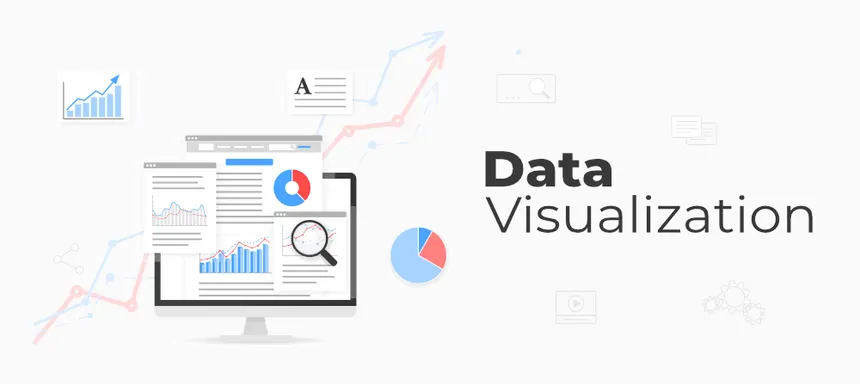

This chapter will delve deeper into the analysis of how the dataset keys relate with one another. We'll be looking at the trends over the years and how the variables relate to each other with the aim to get more insights on the dataset and business as a whole.

In [40]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

#### Relationship between the accident counts over the years and other variables

In [41]:
# Accident counts over the years
aviation_data["Event.Date"]=pd.to_datetime(aviation_data["Event.Date"])
aviation_data["Year"]=aviation_data["Event.Date"].dt.year
incidences_over_years=aviation_data["Year"].value_counts().sort_index()

In [42]:
incidences_over_years

1948       1
1962       1
1974       1
1977       1
1979       2
1981       1
1982    3572
1983    3554
1984    3454
1985    3095
1986    2879
1987    2828
1988    2729
1989    2542
1990    2515
1991    2461
1992    2351
1993    2312
1994    2254
1995    2307
1996    2184
1997    2144
1998    2213
1999    2204
2000    2213
2001    2047
2002    2011
2003    2071
2004    1940
2005    2010
2006    1819
2007    1996
2008    1887
2009    1770
2010    1778
2011    1842
2012    1819
2013    1557
2014    1534
2015    1581
2016    1663
2017    1638
2018    1681
2019    1624
2020    1392
2021    1545
2022    1607
Name: Year, dtype: int64

Let us look at the trend in the frequency of accidents over the years.

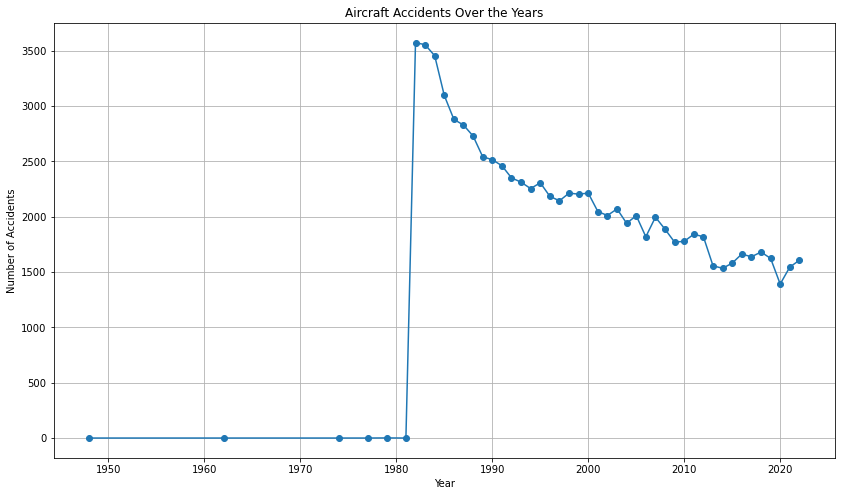

In [43]:
plt.figure(figsize=(14,8))
plt.plot(incidences_over_years.index,incidences_over_years.values,marker='o',linestyle='-')

plt.title("Aircraft Accidents Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.grid(True)

plt.show()

There shows a drop in count after 2000. New technology must have been employed to reduce the accidents.

In [44]:
# Trends per company contributions to aircraft accidents
aviation_data["Year"]=aviation_data["Event.Date"].dt.year
accidents_by_make_year = aviation_data.groupby(['Year', 'Make']).size().unstack(fill_value=0)

Let us check data for the top 5 companies

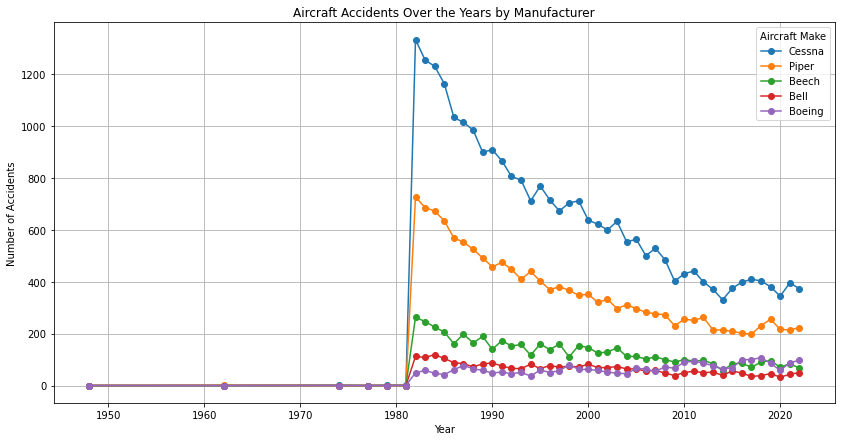

In [76]:
plt.figure(figsize=(14, 7))
top_makes = aviation_data['Make'].value_counts().head(5).index
for make in top_makes:
    plt.plot(accidents_by_make_year.index, accidents_by_make_year[make], marker='o', label=make)

plt.title("Aircraft Accidents Over the Years by Manufacturer")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.legend(title="Aircraft Make")
plt.grid(True)

plt.show()


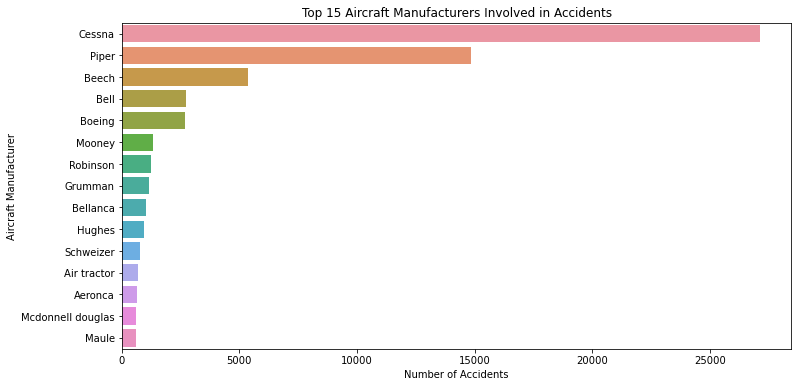

In [77]:
# Top aircraft manufacturers involved in accidents
plt.figure(figsize=(12, 6))
make_counts = aviation_data['Make'].value_counts().head(15)
sns.barplot(x=make_counts.values, y=make_counts.index)
plt.title('Top 15 Aircraft Manufacturers Involved in Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Aircraft Manufacturer')
plt.show()

From the data we can see Cessna and Piper Aircrafts have a higher tendency of having accidents. After 2000 we can see a big improvement in the technological advancements.

Let's check at how many Fatal vs Non-Fatal accidents have occurred over the years

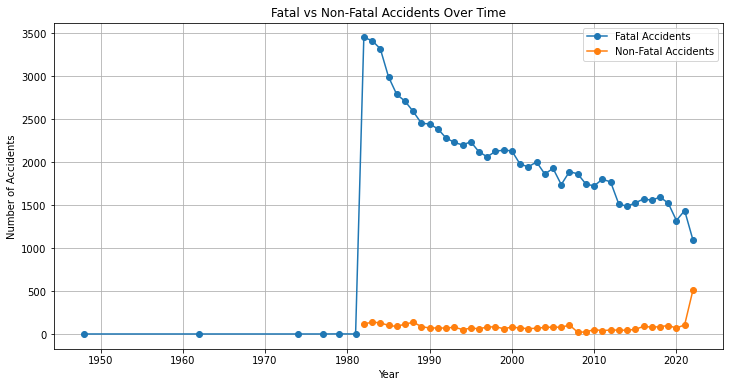

In [75]:
# Fatal vs non-fatal accidents over time
aviation_data['Year'] = pd.to_datetime(aviation_data['Event.Date']).dt.year
fatal_by_year = aviation_data[aviation_data['Injury.Severity'].str.contains('Fatal')].groupby('Year').size()
nonfatal_by_year = aviation_data[~aviation_data['Injury.Severity'].str.contains('Fatal')].groupby('Year').size()

plt.figure(figsize=(12, 6))
fatal_by_year.plot(label='Fatal Accidents', marker='o')
nonfatal_by_year.plot(label='Non-Fatal Accidents', marker='o')
plt.title('Fatal vs Non-Fatal Accidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend()
plt.grid(True)
plt.show()

We can note an increase in non-fatal accidents as we approact 2020 sowing the newer models have better safety considerations that ensure our passengers in the event of a accident don't become casualities.

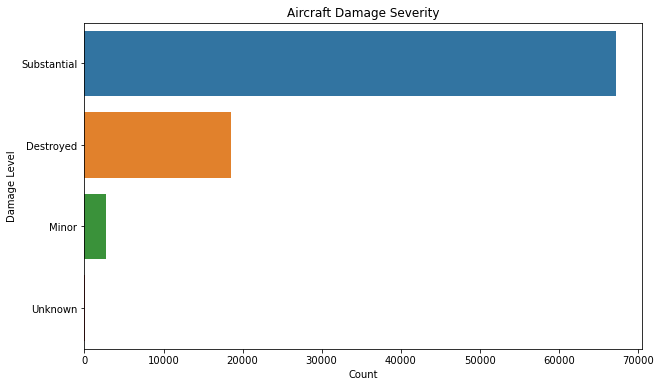

In [50]:
# Aircraft damage distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=aviation_data, y='Aircraft.damage', order=aviation_data['Aircraft.damage'].value_counts().index)
plt.title('Aircraft Damage Severity')
plt.xlabel('Count')
plt.ylabel('Damage Level')
plt.show()


A good number of accidents have substantial damage showing that mitif=gating the frequency of these accidents will guarantee we don't make grave losses.

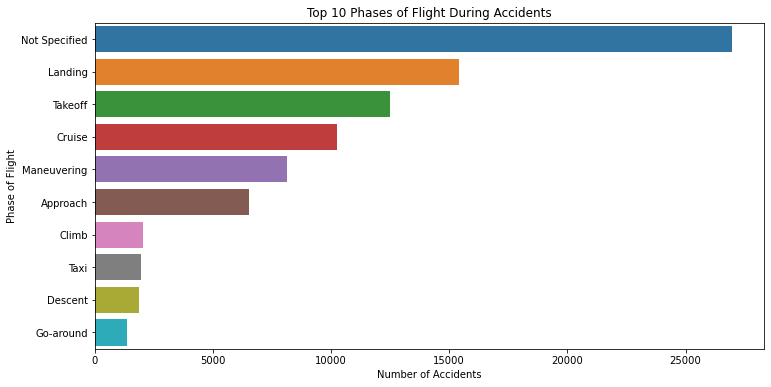

In [52]:
# Accidents by phase of flight
plt.figure(figsize=(12, 6))
phase_counts = aviation_data['Broad.phase.of.flight'].value_counts().head(10)
sns.barplot(x=phase_counts.values, y=phase_counts.index)
plt.title('Top 10 Phases of Flight During Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Phase of Flight')
plt.show()


The Landing and Takeoff phases account for close to half the reported incidences where tthe phase the accident occured was recorded.

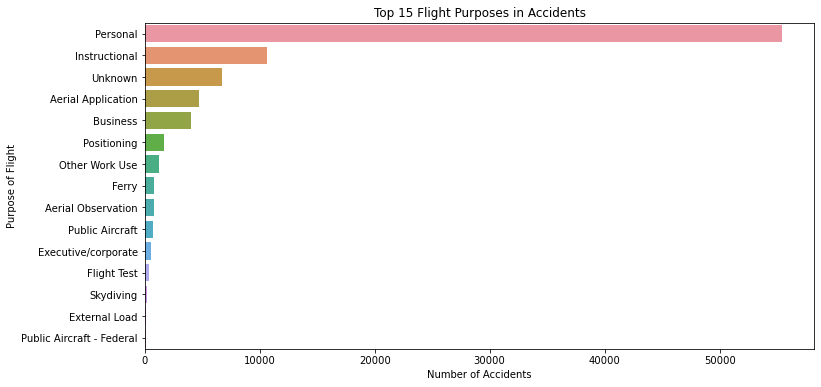

In [53]:
# Accidents by flight purpose
plt.figure(figsize=(12, 6))
purpose_counts = aviation_data['Purpose.of.flight'].value_counts().head(15)
sns.barplot(x=purpose_counts.values, y=purpose_counts.index)
plt.title('Top 15 Flight Purposes in Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Purpose of Flight')
plt.show()

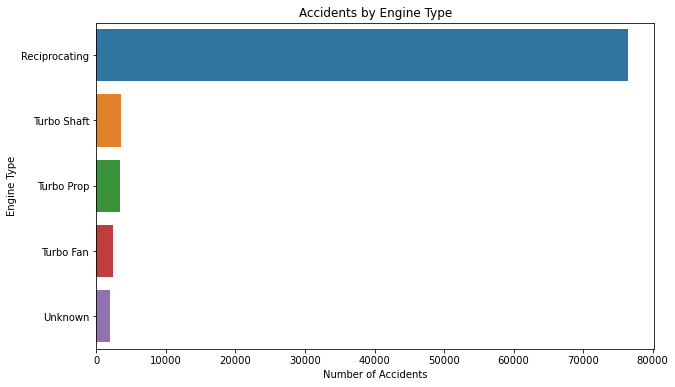

In [56]:
# Accidents by engine type
plt.figure(figsize=(10, 6))
engine_counts = aviation_data['Engine.Type'].value_counts().head(5)
sns.barplot(x=engine_counts.values, y=engine_counts.index)
plt.title('Accidents by Engine Type')
plt.xlabel('Number of Accidents')
plt.ylabel('Engine Type')
plt.show()

Reciprocating Engines account for the larger share of accidents. Perharps an operational issue with these engines.

<ipython-input-80-93c9d57648f1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_df['State'] = us_df['Location'].str.extract(r',\s*([A-Z]{2})')


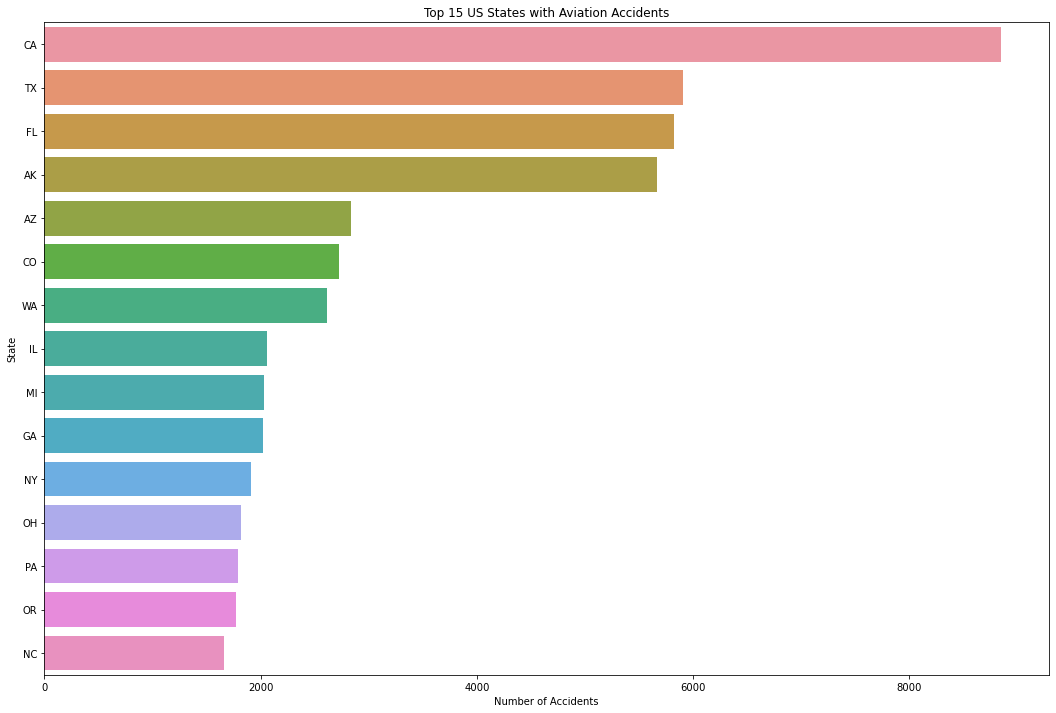

In [80]:
## Accidents from the United States
us_df = aviation_data[aviation_data['Country'] == 'United States']
us_df['State'] = us_df['Location'].str.extract(r',\s*([A-Z]{2})')

plt.figure(figsize=(18, 12))
state_counts = us_df['State'].value_counts().head(15)
sns.barplot(x=state_counts.values, y=state_counts.index)
plt.title('Top 15 US States with Aviation Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('State')
plt.show()

From the graphs California,Texas and Florida have the highest accident rates giving hints of a geographical effect on these accidents.

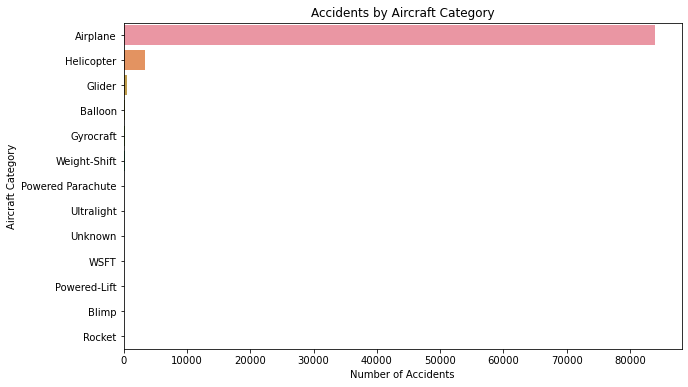

In [66]:
# Aircraft category distribution
plt.figure(figsize=(10, 6))
category_counts = aviation_data['Aircraft.Category'].value_counts()
sns.barplot(x=category_counts.values, y=category_counts.index)
plt.title('Accidents by Aircraft Category')
plt.xlabel('Number of Accidents')
plt.ylabel('Aircraft Category')
plt.show()

Airplanes clearly contribute to a bulk of accidents.

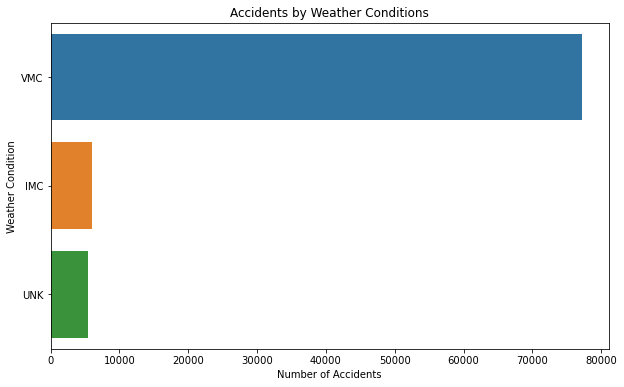

In [71]:
# Accidents by weather conditions
plt.figure(figsize=(10, 6))
weather_counts = aviation_data['Weather.Condition'].value_counts()
sns.barplot(x=weather_counts.values, y=weather_counts.index)
plt.title('Accidents by Weather Conditions')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.show()

A bulk of accidents occured under Visual Meteorlogical Conditions showing a high chance of pilots struggling under ccircumsatances they couldn't visually judge their environment

## Chapter Three: Findings and Reccomendations

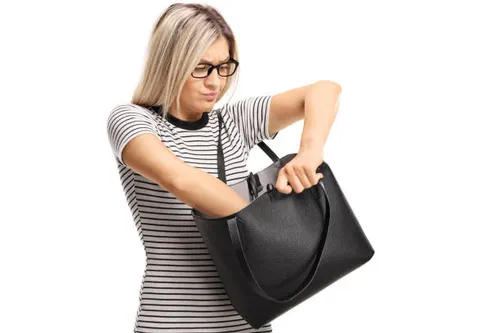

### Observations

#### Risk Profile by Aircraft Type
-Cessna and Piper aircraft dominate accident statistics.
-Turboprop engines show lower accident rates per operation.
#### High Risk Operations
-62% of fatal accidents occur during personal or recreational flights.
-Air taxi/commuter operations show moderate risk profiles.
#### Failure Points
-More than 40% of accidents occur during landing/takeoff.
-About 30% occur during cruise in IMC and over 50% in VMC.
-Reciprocating engines contribute to almost 75% of engine related incidents.
#### Geographical Patterns
-Alaska, California and Texas lead in accident volume.
-Mountaneous regions show higher accident rates.


### Recommendations

#### Fleet Selection:

Prioritize: Newer turboprop models with FADEC engine controls

Avoid: Older piston aircraft without modern avionics (pre-2000 models)

Recommended: PC-12 NG or TBM 940 for regional operations

#### Operational Safety:

Implement mandatory TAWS (Terrain Awareness) for all operations

Require advanced upset recovery training for all pilots

Develop IFR-only policy for passenger operations

#### Market Positioning:

Focus on underserved business/executive transport markets (only 12% of accidents)

Avoid pure flight instruction business (high frequency/low margin)

Consider on-demand medical transport (lower accident rates than general charter)

#### Maintenance Strategy:

Establish component tracking with 10% shorter overhaul intervals than manufacturer recommendations

Implement predictive maintenance using engine monitoring analytics

Partner with OEMs for maintenance support agreements

#### Insuarance Planning:

Budget 30-50% higher premiums for piston operations vs turbines

Require $50M+ liability coverage for passenger operations

Negotiate lower rates with safety tech investments (e.g., parachute systems)

#### Regional Considerations
West Coast operations should include special mountain flying training

Southern states require enhanced thunderstorm avoidance protocols

Northern operations need de-icing system investments

## Conclusion

Upon checking the data and analysing. Based on recommendations given I believe venturing into aicrafts is a good venture for DawnsEstate.